In [5]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.client import timeline

np.random.seed(3)

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data/hand/train',
    target_size=(24, 24),
    batch_size=3,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator= test_datagen.flow_from_directory(
    'data/hand/hard/test',
    target_size=(24, 24),
    batch_size=3,
    class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


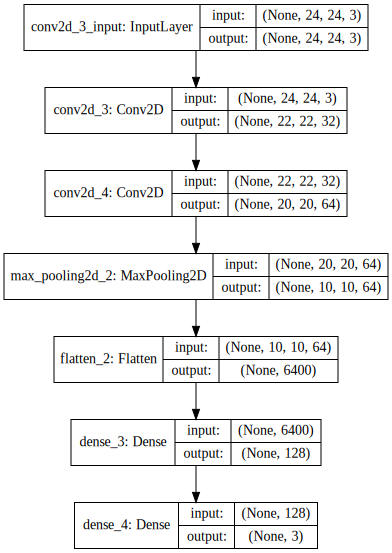

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(24, 24, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
run_metadata = tf.RunMetadata()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], options=run_options, run_metadata=run_metadata)

In [9]:
model.fit_generator( train_generator, steps_per_epoch=15, epochs=50, validation_data=test_generator, validation_steps=5)
trace = timeline.Timeline(step_stats=run_metadata.step_stats)
with open('timeline.ctf.json', 'w') as f:
    f.write(trace.generate_chrome_trace_format())

Epoch 1/50
15/15 [==============================] - 2s 158ms/step - loss: 0.8080 - acc: 0.6667 - val_loss: 2.0271 - val_acc: 0.3333
Epoch 2/50
15/15 [==============================] - 2s 129ms/step - loss: 0.1316 - acc: 0.9778 - val_loss: 2.5154 - val_acc: 0.4000
Epoch 3/50
15/15 [==============================] - 2s 106ms/step - loss: 0.0388 - acc: 1.0000 - val_loss: 3.5129 - val_acc: 0.4000
Epoch 4/50
15/15 [==============================] - 2s 115ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 3.7923 - val_acc: 0.4000
Epoch 5/50
15/15 [==============================] - 2s 110ms/step - loss: 4.6380e-04 - acc: 1.0000 - val_loss: 4.3637 - val_acc: 0.3333
Epoch 6/50
15/15 [==============================] - 2s 102ms/step - loss: 1.0053e-04 - acc: 1.0000 - val_loss: 4.6412 - val_acc: 0.3333
Epoch 7/50
15/15 [==============================] - 2s 110ms/step - loss: 8.5302e-05 - acc: 1.0000 - val_loss: 4.7558 - val_acc: 0.3333
Epoch 8/50
15/15 [==============================] - 2s 117ms/ste

In [22]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 40.00%


In [16]:
print("--Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float':lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

--Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.000 0.001 0.999]
 [0.042 0.913 0.046]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.998 0.000 0.002]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.013 0.987]
 [1.000 0.000 0.000]]
